# Install libraries and load the dataset

In [2]:
import pandas_profiling as pp
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import visual as vs

In [3]:
!chmod 777 'globalterrorismdb_0718dist.csv'

In [4]:
GTD = pd.read_csv('globalterrorismdb_0718dist.csv', engine = 'python')

# Exploring the Dataset

The Global Terrorism Database (GTD) is maintained by the National Consortium for the Study of Terrorism and Responses to Terrorism (START). The current GTD is the product of several phases of data collection efforts, each relying on publicly available, unclassified source materials. These include media articles and electronic news archives, and to a lesser extent, existing data sets, secondary source materials such as books and journals, and legal documents.

**GTD Definition of Terrorism**

The GTD defines a terrorist attack as the threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation. In practice this means in order to consider an incident for inclusion in the GTD, all three of the following attributes must be present:

- The incident must be intentional;

- The incident must entail some level of violence or immediate threat of violence;

- The perpetrators of the incidents must be sub-national actors;

The entire dataset has 135 features and about 180k rows of data

In [4]:
GTD.shape

(181691, 135)

In [5]:
GTD.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
print("{}% of incidents occured at least one death.".format(round(float(GTD[GTD.nkill > 0]['nkill'].count())/GTD.nkill.notna().sum()*100,2)))

48.56% of incidents occured at least one death.


Number of deaths by year from 1970 to 2017:

/usr/lib/python2.7/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/lib/python2.7/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

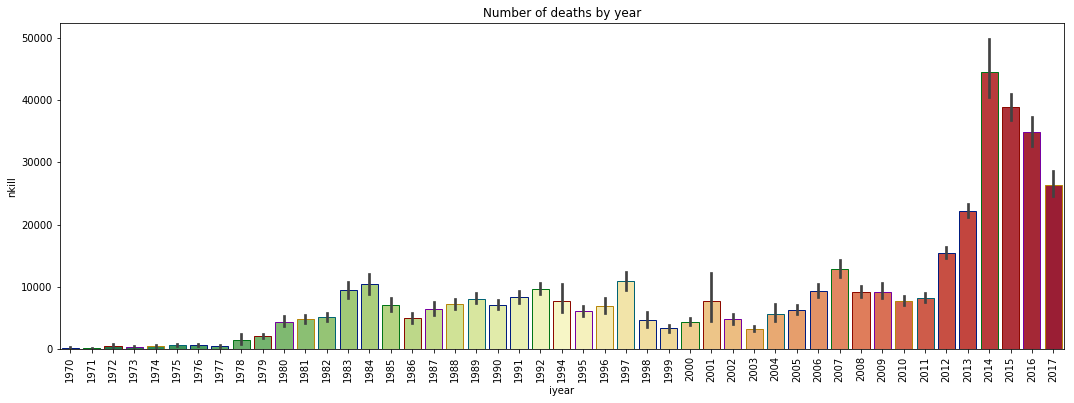

In [5]:
plt.subplots(figsize=(18,6))
ax = sns.barplot(x="iyear", y="nkill", data=GTD, estimator = sum, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7)).set_title('Number of deaths by year')
plt.xticks(rotation=90)

In [16]:
pie_GTD = GTD[['region_txt', 'death']].where(GTD['death']==1)

In [17]:
pie_GTD

,region_txt,death
0,Central America & Caribbean,1.0
1,NaN,NaN
2,Southeast Asia,1.0
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


# Preparing the dataset

### Treat Missing Values
*- Avoid features with more than 50% of NAN*

*- Fill NA*
### Transform skewed continuos features and Normalize numerical features

### Transform categorical to numerical variables
*- One Hot Encoding*

*- Label Encoding*
### Correlation Matrix and Feature Importance

### Shuffle and Split Data

### Creating the target variable

In [7]:
print("GTD length before: %.2d " % len(GTD))
GTD = GTD[GTD['nkill'].notnull()]
GTD['death'] = np.where(GTD.nkill > 0, 1, 0)
GTD = GTD.drop(['nkill'], axis = 1)
print("GTD length after: %.2d " % len(GTD))

GTD length before: 181691 
GTD length after: 171378 


### Treating Missing Values

Avoid features with more than 50% of missing values

In [8]:
columns = GTD.columns
percent_missing = GTD.isnull().sum() * 100 / len(GTD)
unique = GTD.nunique()
dtypes = GTD.dtypes
missing_value_data = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing,
                                 'unique': unique,
                                 'types': dtypes})
missing_value_data = missing_value_data[missing_value_data['percent_missing']>0]
missing_value_data=missing_value_data.sort_values(by=['percent_missing'], ascending=False)

/usr/lib/python2.7/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104]), <a list of 105 Text xticklabel objects>)

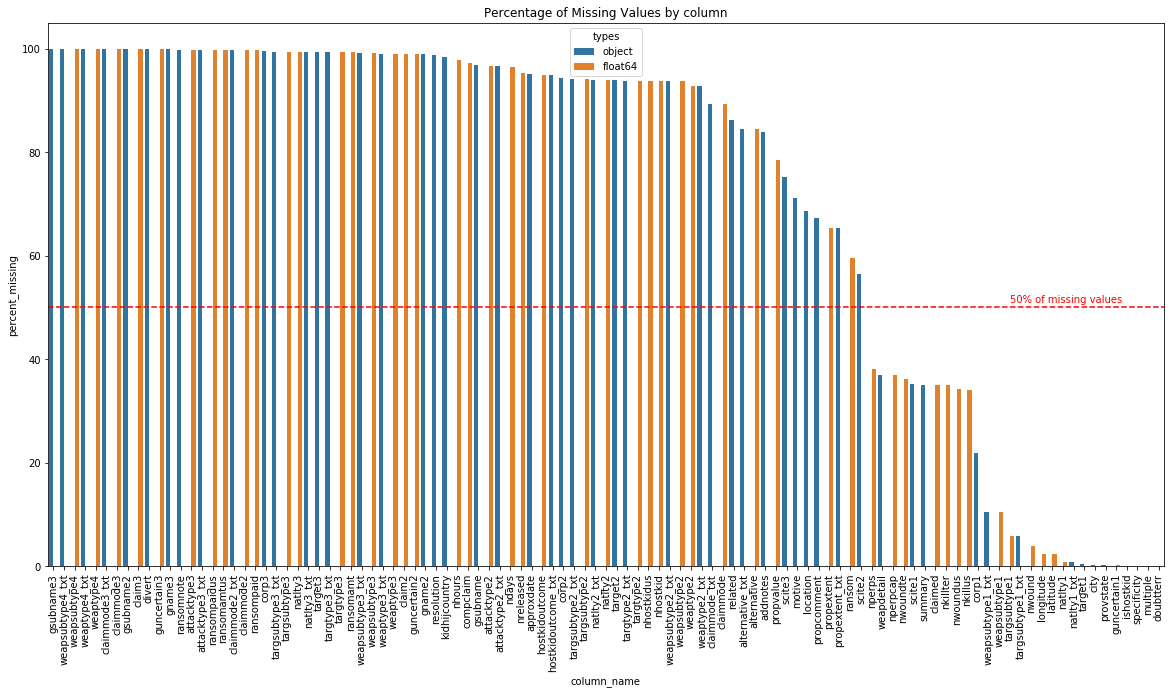

In [9]:
#plt.style.use('tableau-colorblind10')
plt.subplots(figsize=(20,10))
ax = sns.barplot(x="column_name", y="percent_missing", hue='types', data=missing_value_data)
ax.axhline(50, ls='--', color = 'r')
ax.text(90,51,"50% of missing values", color = 'r')
ax.set_title("Percentage of Missing Values by column")
plt.xticks(rotation=90)

In [10]:
missing_value_data

,column_name,percent_missing,types,unique
gsubname3,gsubname3,99.990664,object,11
weapsubtype4_txt,weapsubtype4_txt,99.960322,object,16
weapsubtype4,weapsubtype4,99.960322,float64,16
weaptype4_txt,weaptype4_txt,99.958571,object,5
weaptype4,weaptype4,99.958571,float64,5
claimmode3_txt,claimmode3_txt,99.927645,object,8
claimmode3,claimmode3,99.927645,float64,8
gsubname2,gsubname2,99.910724,object,58
claim3,claim3,99.825532,float64,2
divert,divert,99.824365,object,139


In [9]:
def missing_values(data,mis_min):
    columns = data.columns
    percent_missing = data.isnull().sum() * 100 / len(data)
    unique = data.nunique()
    missing_value_data = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing,
                                 'unique': unique})
    missing_drop = list(missing_value_data[missing_value_data.percent_missing>mis_min].column_name)
    return(missing_drop)

Number of remaining Features

In [10]:
print("Number of features before dropping features: %.1d" % GTD.shape[1])
GTD['natlty1'].fillna(GTD['country'], inplace = True)

missing_drop = missing_values(GTD,50)
GTD = GTD.drop(missing_drop, axis=1)
print("Number of features after dropping features: %.1d" % GTD.shape[1])

Number of features before dropping features: 135
Number of features after dropping features: 58


In [11]:
(GTD.isnull().sum(axis=0)/len(GTD)*100).sort_values(ascending=False).head(27)

nperps              38.077233
weapdetail          37.028090
nperpcap            36.941148
nwoundte            36.239191
scite1              35.111274
summary             35.075681
claimed             35.070429
nkillter            34.942641
nwoundus            34.212093
nkillus             34.064466
corp1               21.903628
weapsubtype1        10.486177
weapsubtype1_txt    10.486177
targsubtype1         5.795960
targsubtype1_txt     5.795960
nwound               3.828379
longitude            2.347442
latitude             2.346859
natlty1_txt          0.889262
target1              0.348353
city                 0.253241
provstate            0.231652
guncertain1          0.219982
ishostkid            0.094528
specificity          0.003501
multiple             0.000584
doubtterr            0.000584
dtype: float64

In [12]:
mode_fill = ['nwound','longitude','latitude','weapsubtype1','weapsubtype1_txt','targsubtype1','targsubtype1_txt','natlty1_txt','guncertain1','ishostkid', 'specificity','doubtterr','multiple', 'target1', 'city', 'provstate']
for col in mode_fill:
    GTD[col].fillna(GTD[col].mode()[0], inplace=True)

In [13]:
(GTD.isnull().sum(axis=0)/len(GTD)*100).sort_values(ascending=False).head(14)

nperps        38.077233
weapdetail    37.028090
nperpcap      36.941148
nwoundte      36.239191
scite1        35.111274
summary       35.075681
claimed       35.070429
nkillter      34.942641
nwoundus      34.212093
nkillus       34.064466
corp1         21.903628
crit2          0.000000
crit1          0.000000
crit3          0.000000
dtype: float64

In [14]:
GTD['nperps'].fillna(GTD['nperps'].mean(), inplace=True)
GTD = GTD.drop(columns = ['weapdetail', 'scite1', 'summary', 'corp1'])
GTD['nperpcap'].fillna(GTD['nperpcap'].mean(), inplace=True)
GTD['nwoundte'].fillna(GTD['nkillter'])
GTD['nwoundte'].fillna(GTD['nwoundte'].mean(), inplace=True)
GTD['claimed'].fillna(0, inplace=True)
GTD['nkillter'].fillna(GTD['nkillter'].mean(), inplace=True)
GTD['nwoundus'].fillna(GTD['nwoundus'].mean(), inplace=True)
GTD['nkillus'].fillna(GTD['nkillus'].mean(), inplace=True)

Look for a better way to treate features with at least 20% missing

In [15]:
#missing_drop = missing_values(GTD,20)
#GTD = GTD.drop(missing_drop, axis=1)

In [16]:
print((GTD.isnull().sum(axis=0)/len(GTD)*100).sort_values(ascending=False).head(5))
print("Missing values successfully treated!!!")

death              0.0
specificity        0.0
targtype1          0.0
attacktype1_txt    0.0
attacktype1        0.0
dtype: float64
Missing values successfully treated!!!


### Transform skewed continuos features and Normalizing Numerical Features

In [17]:
GTD['suicide'] = GTD.suicide.astype('object')

In [18]:
from scipy.stats import skew

num_features = GTD.dtypes[GTD.dtypes != 'object'].index
skewed_feat = GTD[num_features].apply(lambda x: skew(x))
skewed_feat = skewed_feat[skewed_feat > 0.75]
skewed_feat = skewed_feat.index

GTD[skewed_feat] = np.log1p(GTD[skewed_feat])

/home/fguer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log1p
  


In [19]:
GTD.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,death
0,197000000001,1970,7,2,0.0,4.077537,Dominican Republic,2,Central America & Caribbean,Baghdad,...,0.039597,0.104122,0,0.0,PGIS,0,0,0,0,1
1,197000000002,1970,0,0,0.0,4.875197,Mexico,1,North America,Federal,...,0.039597,0.104122,0,1.0,PGIS,0,1,1,1,0
2,197001000001,1970,1,0,0.0,5.081404,Philippines,5,Southeast Asia,Tarlac,...,0.039597,0.104122,0,0.0,PGIS,-9,-9,1,1,1
5,197001010002,1970,1,1,0.0,5.384495,United States,1,North America,Illinois,...,0.000000,0.000000,1,0.0,Hewitt Project,-9,-9,0,-9,0
6,197001020001,1970,1,2,0.0,5.389072,Uruguay,3,South America,Montevideo,...,0.039597,0.104122,0,0.0,PGIS,0,0,0,0,0


### Label Encoder

In [20]:
cat_features = GTD.dtypes[GTD.dtypes == 'object'].index

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in cat_features:
    GTD[col] = le.fit_transform(GTD[col])

### Avoiding duplicated features

In [21]:
duplicated_columns = [col for col in GTD.columns if "_txt" in col]
print("There are %.2d duplicated columns to be removed"%(len(duplicated_columns)))
GTD = GTD.drop(duplicated_columns, axis=1)

There are 08 duplicated columns to be removed


### Correlation and Most importante Features

**Correlation Matrix**

In [22]:
corr_matrix = GTD.corr()
abs(corr_matrix['death']).sort_values(ascending=False).head(10)

death           1.000000
weapsubtype1    0.318889
attacktype1     0.269112
nwound          0.254170
success         0.234530
nkillter        0.202356
suicide         0.184430
weaptype1       0.133384
property        0.128894
region          0.128581
Name: death, dtype: float64

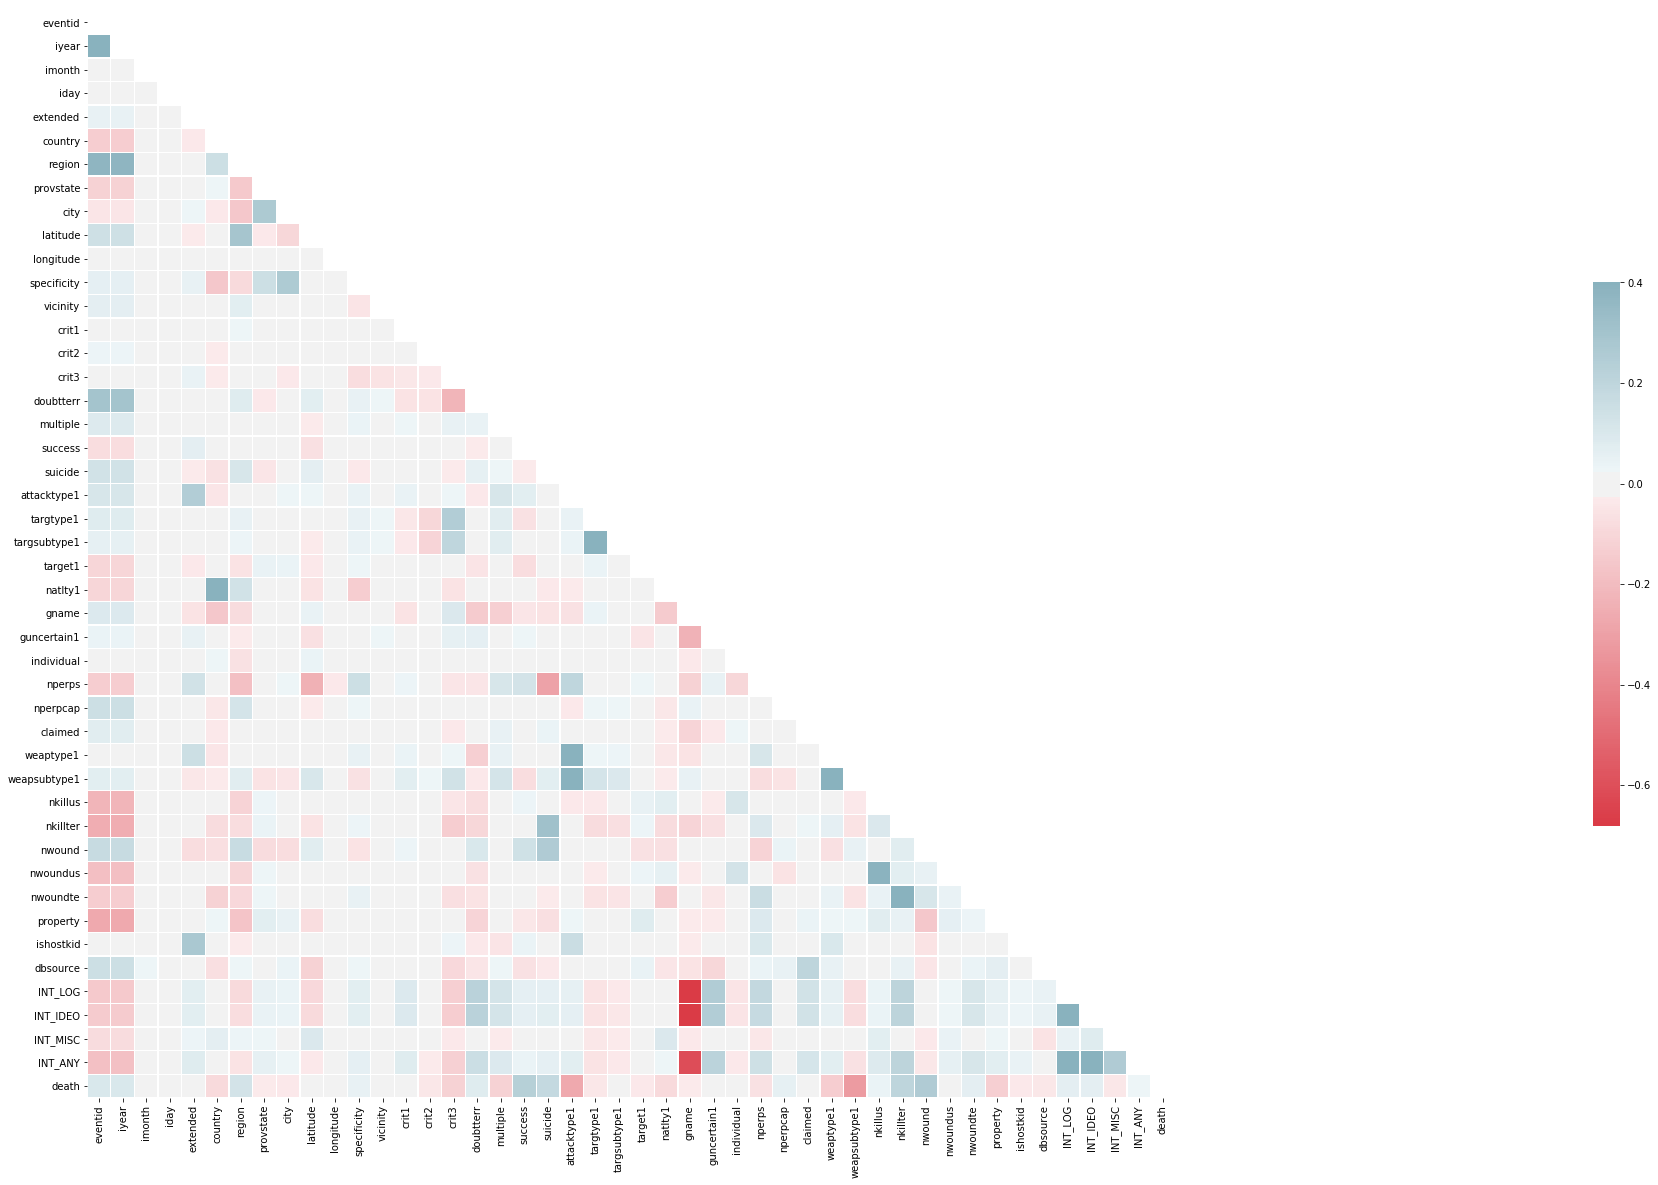

In [23]:
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(150,20))
cmap = sns.diverging_palette(10,220, as_cmap = True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.4, center=0, square=True, linewidths=.3, cbar_kws={"shrink": .5})

### Shuffle and Split the data

In [24]:
GTD.head(5)

,eventid,iyear,imonth,iday,extended,country,region,provstate,city,latitude,...,nwoundus,nwoundte,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,death
0,197000000001,1970,7,2,0.0,4.077537,2,209,28612,18.456792,...,0.039597,0.104122,0,0.0,13,0,0,0,0,1
1,197000000002,1970,0,0,0.0,4.875197,1,774,21276,19.371887,...,0.039597,0.104122,0,1.0,13,0,1,1,1,0
2,197001000001,1970,1,0,0.0,5.081404,5,2474,33162,15.478598,...,0.039597,0.104122,0,0.0,13,-9,-9,1,1,1
5,197001010002,1970,1,1,0.0,5.384495,1,1004,6102,37.005105,...,0.000000,0.000000,1,0.0,8,-9,-9,0,-9,0
6,197001020001,1970,1,2,0.0,5.389072,3,1625,21795,-34.891151,...,0.039597,0.104122,0,0.0,13,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

income = GTD['death']

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(GTD.drop(['death'], axis=1),
                                                    income,
                                                    shuffle=True,
                                                    test_size = 0.2,
                                                    random_state = 43)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 137102 samples.
Testing set has 34276 samples.


# Evaluation Model Perfomance

## Training and Predicting Pipeline

In [26]:
from sklearn.metrics import fbeta_score, accuracy_score
import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    results = {}

    start = time.time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time.time()
    
    # Training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time.time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time.time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5, average = 'weighted')
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test,  beta = 0.5, average = 'weighted')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [27]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# TODO: Initialize the three models
clf_A = KNeighborsClassifier()
clf_B = AdaBoostClassifier(random_state = 41)
clf_C = RandomForestClassifier(random_state = 41)
#clf_D = GaussianNB()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
    # HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100/10)
samples_1 = int(samples_100/100)


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
accuracy = 0
f1 = 0
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, f1)

/usr/lib/python2.7/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
for k, v in results.items():
    print("Model: %s" %(k))
    for i in v:
        print("Accuraccy: %.4f \n Fscore_test: %.4f" %(v[i]['acc_test'], v[i]['f_test']))

### Tuning the Random Forest Classifier

#### Feature Importances

In [ ]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
X = GTD.drop(['death'], axis=1)
y = GTD['death']
model.fit(X, y)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

feat_importances = [(feature, round(importance, 3)) for feature, importance in zip(GTD.columns, importances)]
feat_importances = sorted(feat_importances, key = lambda x: x[1], reverse = True)
feat_importances

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
# display the relative importance of each attribute
#print(model.feature_importances_)

In [ ]:
from sklearn.feature_selection import SelectFromModel

feat_labels = GTD.columns
sfm = SelectFromModel(clf, threshold=0.02)
sfm.fit(X_train, y_train)
important_feat = [feat_labels[col] for col in sfm.get_support(indices=True)]
#for feature_list_index in sfm.get_support(indices=True):
#    print(feat_labels[feature_list_index])
important_feat.append('death')

In [ ]:
X_important_test = sfm.transform(X_test)
X_important_train = sfm.transform(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

rf = RandomForestClassifier(random_state = 41)
rf.fit(X_important_train, y_train)
important_pred = rf.predict(X_important_test)

print("Accuracy after Feature Selection: %.2f" %round((accuracy_score(y_test, important_pred)*100),2))
print("F_score after Feature Selection: %.2f" %round((f1_score(y_test, important_pred)*100),2))

#### Validation Set

In [ ]:
X_intermediate, X_test, y_intermediate, y_test = train_test_split(GTD.drop(['death'], axis=1),
                                                                  income,
                                                                  shuffle=True,
                                                                  test_size = 0.2,
                                                                  random_state = 43)

X_train, X_validation, y_train, y_validation = train_test_split(X_intermediate,
                                                                y_intermediate,
                                                                shuffle=False,
                                                                test_size=0.2,
                                                                random_state=43)
# delete intermediate variables
del X_intermediate, y_intermediate

# print proportions
print('train: {}% | validation: {}% | test {}%'.format(round(float(len(y_train))/len(income),2),
                                                       round(float(len(y_validation))/len(income),2),
                                                       round(float(len(y_test))/len(income),2)))

In [ ]:
rf.fit(X_train, y_train)

print('-'*40)
print("Train:")
print("Accuracy: %.2f" %round((accuracy_score(y_train, rf.predict(X_train))*100),2))
print("F_score: %.2f" %round((f1_score(y_train, rf.predict(X_train))*100),2))
print('-'*40)
print("Validation:")
print("Accuracy: %.2f" %round((accuracy_score(y_validation, rf.predict(X_validation))*100),2))
print("F_score: %.2f" %round((f1_score(y_validation, rf.predict(X_validation))*100),2))
print('-'*40)
print("Test:")
print("Accuracy: %.2f" %round((accuracy_score(y_test, rf.predict(X_test))*100),2))
print("F_score: %.2f" %round((f1_score(y_test, rf.predict(X_test))*100),2))
print('-'*40)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 20, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 11, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
"""rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)
best_random = rf_random.best_estimator_
best_random"""

In [ ]:
best_random = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=41, verbose=0, warm_start=False)

In [ ]:
new_rf = best_random
new_rf.fit(X_train, y_train)

print('-'*40)
print("Test:")
print("Accuracy: %.2f" %round((accuracy_score(y_test, new_rf.predict(X_test))*100),2))
print("F_score: %.2f" %round((f1_score(y_test, new_rf.predict(X_test))*100),2))
print('-'*40)

**When happens deathes in attacks, how often the model predicts no deathes?**

This is the most critical case because the huge problem is whether the model predicts Negative for death occurrence, but the truth is Positive.

In [ ]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, new_rf.predict(X_test))
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
print("Given death occurrance in attacks, the model mistakenly predicted no deathes in {}% cases.".format(round(float(FN)/(FN+TP)*100,2)))
conf_mat_df = pd.DataFrame(conf_matrix)